# LSTM

# Importing the dependencies

In [ ]:
#Importing libraries
import os
import torch
import torch.nn as nn
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import pandas as pd
import seaborn as sns
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Data Understanding

In [ ]:
df = pd.read_csv('IMDB Dataset.csv') 

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.shape

(50000, 2)

In [ ]:
df.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [ ]:
df.sentiment = df.sentiment.replace({'positive': 1, 'negative': 0})

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [ ]:
from wordcloud import WordCloud

In [ ]:
#This line imports the Python regular expression module, which allows us to work with patterns in text data.
import re
def remove_urls(text):
#This line defines a function called remove_urls that takes in a text parameter.
#The purpose of this function is to remove URLs (i.e., web addresses) from a given text.
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [ ]:
def rm_html(text):
    return re.sub(r'<[^>]+>', '', text)

In [ ]:
#removes the emoji
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r' ', string)

In [ ]:
def removeunwanted_characters(document):
    # Replace @mentions with a space
    document = re.sub("@[A-Za-z0-9_]+"," ", document)
    # Remove hashtags completely
    document = re.sub("#[A-Za-z0-9_]+","", document)
    # Remove any characters that are not alphanumeric or spaces
    document = re.sub("[^0-9A-Za-z ]", "" , document)
    # Remove any emojis from the text
    document = remove_emoji(document)
    # Remove any extra spaces (double spaces) that were created
    document = document.replace('  ',"")
    # Remove any leading or trailing spaces from the document
    return document.strip()


In [ ]:
def rm_whitespaces(text):
    return re.sub(r' +', ' ', text)

In [ ]:
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import RegexpTokenizer

#remove punctuation from a given text.
def remove_punct(text):
    tokenizer = RegexpTokenizer(r"\w+")
    lst=tokenizer.tokenize(' '.join(text))
    return lst

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#keep the stopwords in English language, by passing 'english' as an argument.
stop_words = set(stopwords.words('english'))
#add two common Twitter-specific stopwords, @ and RT
custom_stopwords = ['@', 'RT']
stop_words.update(custom_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# remove stopwords from the given list of tokens.
def remove_stopwords(text_tokens):
    result_tokens = []
    for token in text_tokens:
        if token not in stop_words:
            result_tokens.append(token)
    return result_tokens

In [ ]:
def lower_order(text):
    small_order_text = text.lower()
    return small_order_text

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize,pos_tag
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

def lemmatization(token_text):
    lemma_tokens = []
    wordnet = WordNetLemmatizer()
    lemmatized_tokens = [wordnet.lemmatize(token, pos = 'v') for token in token_text]
    return lemmatized_tokens

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


THe above code defines a function lemmatization that uses the WordNetLemmatizer class from NLTK to lemmatize a list of tokens, with the option to specify that the tokens should be lemmatized as verbs. This function can be used to convert different forms of a word into their base form for further analysis.

In [ ]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize

# preprocessing
def tokenize(text):
    return word_tokenize(text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def custom_cleaning_pipeline(text):   
  #converts all text to lowercase
    text = lower_order(text)
    #removes URLs from the text.
    text = remove_urls(text)
    #removes URLs from the text.
    text = rm_html(text)
    #removes emoji characters from the text
    text = remove_emoji(text)
    #removes any characters that are not letters, digits, or common punctuation marks.
    text = removeunwanted_characters(text)
    #emoves any extra whitespace characters from the text.
    text = rm_whitespaces(text)
    return text

In [ ]:
custom_cleaning_pipeline(df['review'].iloc[0])

'one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty pictur

In [ ]:
def custom_preprocessing_pipeline(text):
    text = tokenize(text)
    text = remove_punct(text)
    text = remove_stopwords(text)
    lemmatized_text = lemmatization(text)
    return " ".join(lemmatized_text)

In [ ]:
custom_preprocessing_pipeline("Environment\\him")

'Environment'

In [ ]:
%%time

df['cleaned'] = df.review.apply(lambda x : custom_cleaning_pipeline(x))

CPU times: total: 5.06 s
Wall time: 7.91 s


In [ ]:
%%time

df['cleaned'] = df.cleaned.apply(lambda x : custom_preprocessing_pipeline(x))

CPU times: total: 38.3 s
Wall time: 1min 6s


In [ ]:
df = df[['cleaned', 'sentiment']]
df.rename(columns = {'sentiment': 'label'}, inplace = True)

In [ ]:
# data = df.copy()

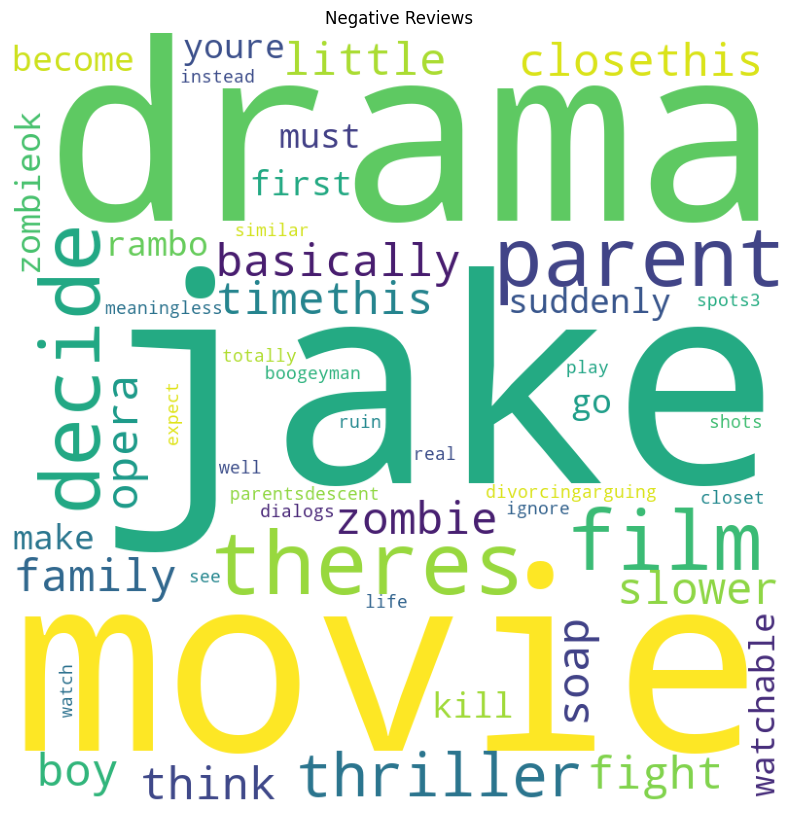

In [ ]:
negative_df = df[df.label == 0]
negative_df = "".join(negative_df.cleaned.values[0])

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(negative_df)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.title("Negative Reviews")
plt.axis('off')
plt.tight_layout(pad=0)

plt.show()

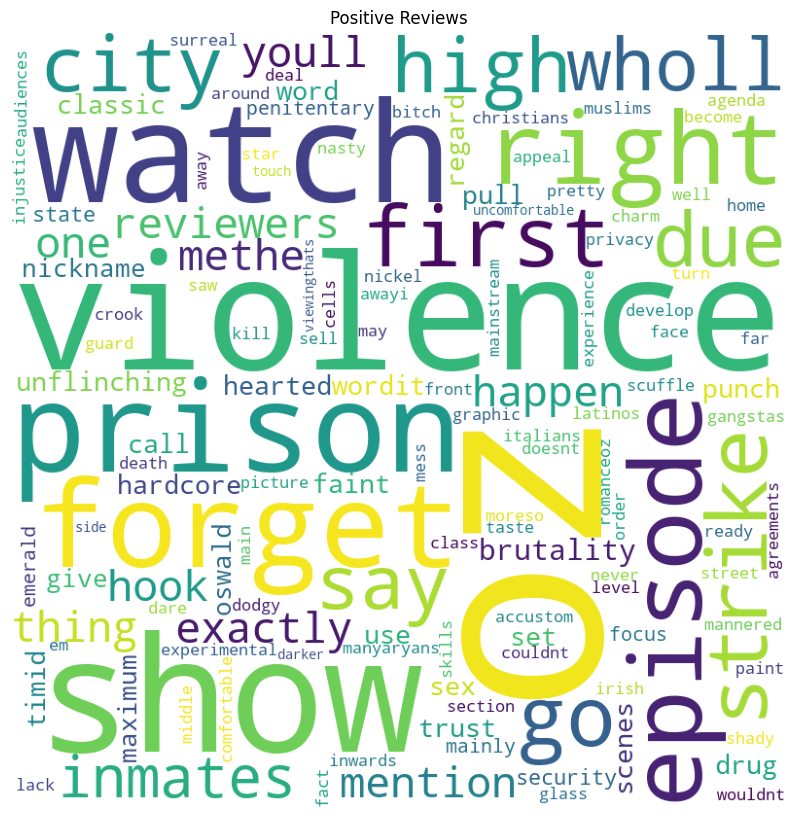

In [ ]:
negative_df = df[df.label == 1]
negative_df = "".join(negative_df.cleaned.values[0])

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(negative_df)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.title("Positive Reviews")
plt.axis('off')
plt.tight_layout(pad=0)

plt.show()

In [ ]:
complete_reviews = df.cleaned.values

In [ ]:
all_words = ' '.join(complete_reviews)

In [ ]:
all_words = all_words.split()

In [ ]:
all_words[:20]

['one',
 'reviewers',
 'mention',
 'watch',
 '1',
 'oz',
 'episode',
 'youll',
 'hook',
 'right',
 'exactly',
 'happen',
 'methe',
 'first',
 'thing',
 'strike',
 'oz',
 'brutality',
 'unflinching',
 'scenes']

In [ ]:
from collections import Counter

In [ ]:
counter = Counter(all_words)

In [ ]:
counter

Counter({'one': 49988,
         'reviewers': 496,
         'mention': 2972,
         'watch': 26886,
         '1': 2073,
         'oz': 247,
         'episode': 3003,
         'youll': 2558,
         'hook': 572,
         'right': 6480,
         'exactly': 1939,
         'happen': 6869,
         'methe': 93,
         'first': 16775,
         'thing': 8818,
         'strike': 967,
         'brutality': 134,
         'unflinching': 30,
         'scenes': 10057,
         'violence': 1957,
         'set': 7118,
         'word': 3493,
         'go': 26725,
         'trust': 686,
         'show': 21250,
         'faint': 115,
         'hearted': 125,
         'timid': 45,
         'pull': 1843,
         'punch': 521,
         'regard': 925,
         'drug': 1619,
         'sex': 3176,
         'hardcore': 249,
         'classic': 3395,
         'use': 9802,
         'wordit': 2,
         'call': 5383,
         'nickname': 83,
         'give': 17142,
         'oswald': 28,
         'maximum':

In [ ]:
frequency_of_words_sorted = sorted(counter, key=counter.get, reverse=True)

In [ ]:
converting_integers_and_words = dict(enumerate(frequency_of_words_sorted, 1))

In [ ]:
converting_integers_and_words[0] = '<PAD>' 

In [ ]:
converting_integers_and_words = {word: id for id, word in converting_integers_and_words.items()}

In [ ]:
converting_integers_and_words

{'film': 1,
 'movie': 2,
 'one': 3,
 'make': 4,
 'like': 5,
 'see': 6,
 'get': 7,
 'time': 8,
 'good': 9,
 'character': 10,
 'watch': 11,
 'go': 12,
 'even': 13,
 'would': 14,
 'think': 15,
 'really': 16,
 'story': 17,
 'show': 18,
 'look': 19,
 'say': 20,
 'much': 21,
 'well': 22,
 'know': 23,
 'end': 24,
 'people': 25,
 'great': 26,
 'bad': 27,
 'also': 28,
 'give': 29,
 'take': 30,
 'play': 31,
 'first': 32,
 'love': 33,
 'act': 34,
 'dont': 35,
 'come': 36,
 'find': 37,
 'movies': 38,
 'could': 39,
 'way': 40,
 'seem': 41,
 'many': 42,
 'want': 43,
 'work': 44,
 'plot': 45,
 'two': 46,
 'never': 47,
 'little': 48,
 'try': 49,
 'best': 50,
 'ever': 51,
 'life': 52,
 'better': 53,
 'man': 54,
 'still': 55,
 'scene': 56,
 'feel': 57,
 'scenes': 58,
 'part': 59,
 'use': 60,
 'something': 61,
 'lot': 62,
 'back': 63,
 'interest': 64,
 'real': 65,
 'im': 66,
 'guy': 67,
 'doesnt': 68,
 'thing': 69,
 'didnt': 70,
 'actors': 71,
 'years': 72,
 'leave': 73,
 'actually': 74,
 'cast': 75,
 'f

In [ ]:
encoded_reviews = [[converting_integers_and_words[word] for word in individual_review.split()] for individual_review in tqdm(complete_reviews)]

100%|██████████| 50000/50000 [00:02<00:00, 24376.75it/s]


In [ ]:
unique_lengths = set([len(i) for i in encoded_reviews])

In [ ]:
unique_lengths

{3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,


In [ ]:
for i in range(0, 10):
    print(encoded_reviews[i][:10])

[3, 1692, 328, 11, 468, 2953, 325, 384, 1504, 111]
[305, 48, 283, 1, 2608, 14832, 76541, 1097, 29, 3107]
[15, 305, 40, 344, 8, 789, 1254, 2079, 308, 632]
[593, 145, 156, 48, 358, 3108, 15, 145, 911, 43648]
[76548, 28362, 33, 8, 203, 1873, 1014, 1, 11, 365]
[154, 3211, 425, 2, 17, 37691, 2099, 6581, 3109, 474]
[171, 14, 5, 6, 7475, 634, 53488, 133, 6477, 544]
[18, 337, 76559, 233, 872, 32, 632, 32, 1091, 1098]
[2271, 989, 319, 1, 19, 782, 11, 1, 27, 772]
[5, 127, 2266, 6116, 1919, 5, 2, 101, 86, 33]


In [ ]:
# padding sequences
def paddind_sequences(cleaned_text, padding_value, max_length_of_sequence=256):

    new_feature = np.full((len(cleaned_text), max_length_of_sequence), padding_value, dtype=int)

    for i, row in enumerate(cleaned_text):
        new_feature[i, :len(row)] = np.array(row)[:max_length_of_sequence]
    return new_feature

In [ ]:
max_length_of_sequence = 256

features = paddind_sequences(encoded_reviews, padding_value=converting_integers_and_words['<PAD>'], max_length_of_sequence=max_length_of_sequence)

In [ ]:
targets = df.label.to_numpy()
targets

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, random_state=42)

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
print("The shapes for Training set: ", X_train.shape, y_train.shape)

The shapes for Training set:  (35000, 256) (35000,)


In [ ]:
print("The shapes for Validation set: ", X_val.shape, y_val.shape)

The shapes for Validation set:  (7500, 256) (7500,)


In [ ]:
print("The shapes for Test set: ", X_test.shape, y_test.shape)

The shapes for Test set:  (7500, 256) (7500,)


In [ ]:
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
batch_size = 512

In [ ]:
# Lets create tensordatasetss
training_set = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
validation_set = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val))
testing_set = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))

In [ ]:
# lets proceed to create pytorch dataloaders next.
train_dl = DataLoader(training_set, shuffle=True, batch_size=batch_size)
val_dl = DataLoader(validation_set, shuffle=True, batch_size=batch_size)
test_dl = DataLoader(testing_set, shuffle=True, batch_size=batch_size)

# Building LSTM

In [ ]:
import torch.nn.functional as F

In [ ]:
class LSTM(nn.Module):
    def __init__(self, vocab_size, output_size, hidden_size=128, embedding_size=400, n_layers=2, dropout=0.2):
        # Initialize LSTM as a subclass of nn.Module
        super(LSTM, self).__init__()  
        # Define an embedding layer
        self.embedding_layer = nn.Embedding(vocab_size, embedding_size) 
        # Define an LSTM layer
        self.lstm_layer = nn.LSTM(embedding_size, hidden_size, n_layers, dropout=dropout, batch_first=True)  
         # Define a dropout layer
        self.dropout_layer = nn.Dropout(p=dropout) 
        # Define a fully connected layer
        self.fully_connected_laeyer = nn.Linear(hidden_size, output_size)  
         # Define a sigmoid activation layer
        self.sigmoid_layer = nn.Sigmoid() 

    def forward(self, input_seq):
        # Convert input sequence to long data type
        input_seq = input_seq.long()  
        # Pass input sequence through the embedding layer
        input_seq = self.embedding_layer(input_seq)  
        # Pass the embedded input sequence through the LSTM layer
        output, _ = self.lstm_layer(input_seq)  
        # Select only the last output of the LSTM layer
        output = output[:, -1, :]  
        # Apply dropout to the selected output
        output = self.dropout_layer(output)  
        # Pass the dropout output through the fully connected layer
        output = self.fully_connected_laeyer(output)  
        # Apply sigmoid activation to the fully connected output
        output = self.sigmoid_layer(output)  
        # Return the final output
        return output  


In [ ]:
# define training device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
len(converting_integers_and_words)

234645

In [ ]:
# model hyperparamters
vocab_size = len(converting_integers_and_words)
output_size = 1
embedding_size = 256
hidden_size = 512
n_layers = 2
dropout=0.2
weight_decay=None

In [ ]:
# model initialization
model = LSTM(vocab_size, output_size, hidden_size, embedding_size, n_layers, dropout)
model = model.to(device)
print(model)

LSTM(
  (embedding_layer): Embedding(234645, 256)
  (lstm_layer): LSTM(256, 512, num_layers=2, batch_first=True, dropout=0.2)
  (dropout_layer): Dropout(p=0.2, inplace=False)
  (fully_connected_laeyer): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid_layer): Sigmoid()
)


<b> Due to some issues with PyTorch, we have instead created model summary for equivalent LSTM model in Keras and Tensorflow. 

![ModelSummary](Picture1.jpg)


# Model Training

In [ ]:
#set the learning rate to 0.001
lr = 0.001
#Binary cross entropy loss
criterion = nn.BCELoss()  
#Adam optimizer
optim = torch.optim.Adam(model.parameters(), lr=lr)
#Gradient clip threshhold 5
grad_clip = 5
epochs = 20

In [ ]:
device

device(type='cuda')

In [ ]:
sigmoid_activation = nn.Sigmoid() 

In [ ]:
# train loop
train_losses = []
train_accs = []
val_losses = []
val_accs = []

best_val_loss = float('inf')
patience = 7
early_stopping_counter = 0

for epoch in range(epochs):

    model.train()

    train_loss = 0
    train_acc = 0

    for feature, target in tqdm(train_dl):
        # move to device
        feature, target = feature.to(device), target.to(device)

        # reset optimizer
        optim.zero_grad()

        # forward pass
        out = model(feature)

        # acc
        predicted = torch.tensor([1 if i == True else 0 for i in out > 0.5], device=device)
        equals = predicted == target
        acc = torch.mean(equals.type(torch.FloatTensor))
        train_acc += acc.item()

        # loss
        loss = criterion(out.squeeze(), target.float())
        train_loss += loss.item()
        loss.backward()

        # clip grad
        nn.utils.clip_grad_norm_(model.parameters(), grad_clip)

        # update optimizer
        optim.step()

        # free some memory
        del feature, target, predicted

    train_loss = train_loss / len(train_dl)
    train_acc = train_acc / len(train_dl)
    train_losses.append(train_loss)
    train_accs.append(train_acc)


    model.eval()

    val_loss = 0
    val_acc = 0

    with torch.no_grad():
        for feature, target in val_dl:            
            # move to device
            feature, target = feature.to(device), target.to(device)

            # forward pass
            out = model(feature)

            # acc
            predicted = torch.tensor([1 if i == True else 0 for i in out > 0.5], device=device)
            equals = predicted == target
            acc = torch.mean(equals.type(torch.FloatTensor))
            val_acc += acc.item()

            # loss
            loss = criterion(out.squeeze(), target.float())
            val_loss += loss.item()

            # free some memory
            del feature, target, predicted

    val_loss = val_loss / len(val_dl)
    val_acc = val_acc / len(val_dl)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    print(f"Epoch {epoch+1}:")
    print(f"Training Loss: {train_loss:.4f} | Training Accuracy: {train_acc*100:.4f}%")
    print(f"Validation Loss: {val_loss:.4f} | Validation Accuracy: {val_acc*100:.4f}%")

    ''' IMPLEMENTEING CUSTOM EARLY STOPPING '''
    if val_loss < best_val_loss:
        early_stopping_counter = 0
        best_val_loss = val_loss
    else:
        early_stopping_counter += 1
        if early_stopping_counter >= patience:
            print(f"Early stopping triggered after {patience} epochs without improvement.")
            break


100%|██████████| 69/69 [01:01<00:00,  1.12it/s]


Epoch 1:
Training Loss: 0.6947 | Training Accuracy: 50.2833%
Validation Loss: 0.6941 | Validation Accuracy: 49.1563%


100%|██████████| 69/69 [01:04<00:00,  1.07it/s]


Epoch 2:
Training Loss: 0.6905 | Training Accuracy: 51.3345%
Validation Loss: 0.6941 | Validation Accuracy: 49.3982%


100%|██████████| 69/69 [01:06<00:00,  1.04it/s]


Epoch 3:
Training Loss: 0.6797 | Training Accuracy: 52.5180%
Validation Loss: 0.6994 | Validation Accuracy: 49.7857%


100%|██████████| 69/69 [01:05<00:00,  1.05it/s]


Epoch 4:
Training Loss: 0.6654 | Training Accuracy: 53.2681%
Validation Loss: 0.7121 | Validation Accuracy: 49.7336%


100%|██████████| 69/69 [01:06<00:00,  1.04it/s]


Epoch 5:
Training Loss: 0.6465 | Training Accuracy: 54.2673%
Validation Loss: 0.7425 | Validation Accuracy: 51.8046%


100%|██████████| 69/69 [01:07<00:00,  1.02it/s]


Epoch 6:
Training Loss: 0.6624 | Training Accuracy: 57.1383%
Validation Loss: 0.6894 | Validation Accuracy: 65.7034%


100%|██████████| 69/69 [01:06<00:00,  1.03it/s]


Epoch 7:
Training Loss: 0.6454 | Training Accuracy: 56.1019%
Validation Loss: 0.7343 | Validation Accuracy: 51.4367%


100%|██████████| 69/69 [01:07<00:00,  1.03it/s]


Epoch 8:
Training Loss: 0.6400 | Training Accuracy: 54.4198%
Validation Loss: 0.7651 | Validation Accuracy: 49.6484%


100%|██████████| 69/69 [01:07<00:00,  1.03it/s]


Epoch 9:
Training Loss: 0.6399 | Training Accuracy: 54.4997%
Validation Loss: 0.7723 | Validation Accuracy: 50.1291%


100%|██████████| 69/69 [01:07<00:00,  1.02it/s]


Epoch 10:
Training Loss: 0.6291 | Training Accuracy: 58.2234%
Validation Loss: 0.7395 | Validation Accuracy: 52.5152%


100%|██████████| 69/69 [01:07<00:00,  1.03it/s]


Epoch 11:
Training Loss: 0.5709 | Training Accuracy: 71.6408%
Validation Loss: 0.6038 | Validation Accuracy: 73.6182%


100%|██████████| 69/69 [01:07<00:00,  1.02it/s]


Epoch 12:
Training Loss: 0.5196 | Training Accuracy: 75.0151%
Validation Loss: 0.5388 | Validation Accuracy: 76.9028%


100%|██████████| 69/69 [01:07<00:00,  1.02it/s]


Epoch 13:
Training Loss: 0.4362 | Training Accuracy: 80.5441%
Validation Loss: 0.5230 | Validation Accuracy: 78.4741%


100%|██████████| 69/69 [01:07<00:00,  1.02it/s]


Epoch 14:
Training Loss: 0.3738 | Training Accuracy: 84.6499%
Validation Loss: 0.4600 | Validation Accuracy: 82.0021%


100%|██████████| 69/69 [01:07<00:00,  1.02it/s]


Epoch 15:
Training Loss: 0.2825 | Training Accuracy: 89.2924%
Validation Loss: 0.4388 | Validation Accuracy: 83.3573%


100%|██████████| 69/69 [01:08<00:00,  1.01it/s]


Epoch 16:
Training Loss: 0.2464 | Training Accuracy: 90.8059%
Validation Loss: 0.4490 | Validation Accuracy: 83.5272%


100%|██████████| 69/69 [01:07<00:00,  1.02it/s]


Epoch 17:
Training Loss: 0.2002 | Training Accuracy: 92.9719%
Validation Loss: 0.4467 | Validation Accuracy: 84.1284%


100%|██████████| 69/69 [01:07<00:00,  1.02it/s]


Epoch 18:
Training Loss: 0.1562 | Training Accuracy: 94.7661%
Validation Loss: 0.4746 | Validation Accuracy: 84.2988%


100%|██████████| 69/69 [01:07<00:00,  1.02it/s]


Epoch 19:
Training Loss: 0.1336 | Training Accuracy: 95.5970%
Validation Loss: 0.4704 | Validation Accuracy: 84.6258%


100%|██████████| 69/69 [01:07<00:00,  1.02it/s]


Epoch 20:
Training Loss: 0.1042 | Training Accuracy: 96.7434%
Validation Loss: 0.5149 | Validation Accuracy: 84.5060%


The model is trained for several epochs (iterations over the entire dataset) on a training set and evaluated on a validation set after each epoch. 

For each epoch, the log shows the progress of the training and validation losses (how well the model is fitting the data) and the training and validation accuracies (how well the model is classifying the data). 

In the earlier epochs, the model's performance on both the training and validation sets is poor. However, as training progresses, the model's performance improves significantly. 

In particular, from epoch 11 onward, the training accuracy increases rapidly and the validation accuracy also increases, indicating that the model is fitting the training data well and generalizing to new data. 

Overall, the model seems to be performing well, achieving high validation accuracy by the end of training.

In [ ]:
torch.save(model.state_dict(), 'LSTM_20Epochs.pth')
!cp LSTM_20Epochs.pth /content/drive/MyDrive/AI_Coursework_Portfolio_Dataset

In [ ]:
training_stats = pd.DataFrame({"Training_Accuracy": train_accs,
                               "Training_Loss": train_losses,
                               "Val_Loss": val_losses,
                               "Val_Accuracy": val_accs})

training_stats.to_csv("LSTM_Training Statistics.csv", index = True)

In [ ]:
training_stats.head()

,Training_Accuracy,Training_Loss,Val_Loss,Val_Accuracy
0,50.283308,0.694711,0.6941,49.1563
1,51.334451,0.690464,0.6941,49.3982
2,52.518017,0.679706,0.6994,49.7857
3,53.268131,0.665419,0.6654,49.7336
4,54.267338,0.646485,0.7425,51.8046


Text(0.5, 0.95, 'LSTM Performance on Training and Validation Datasets')

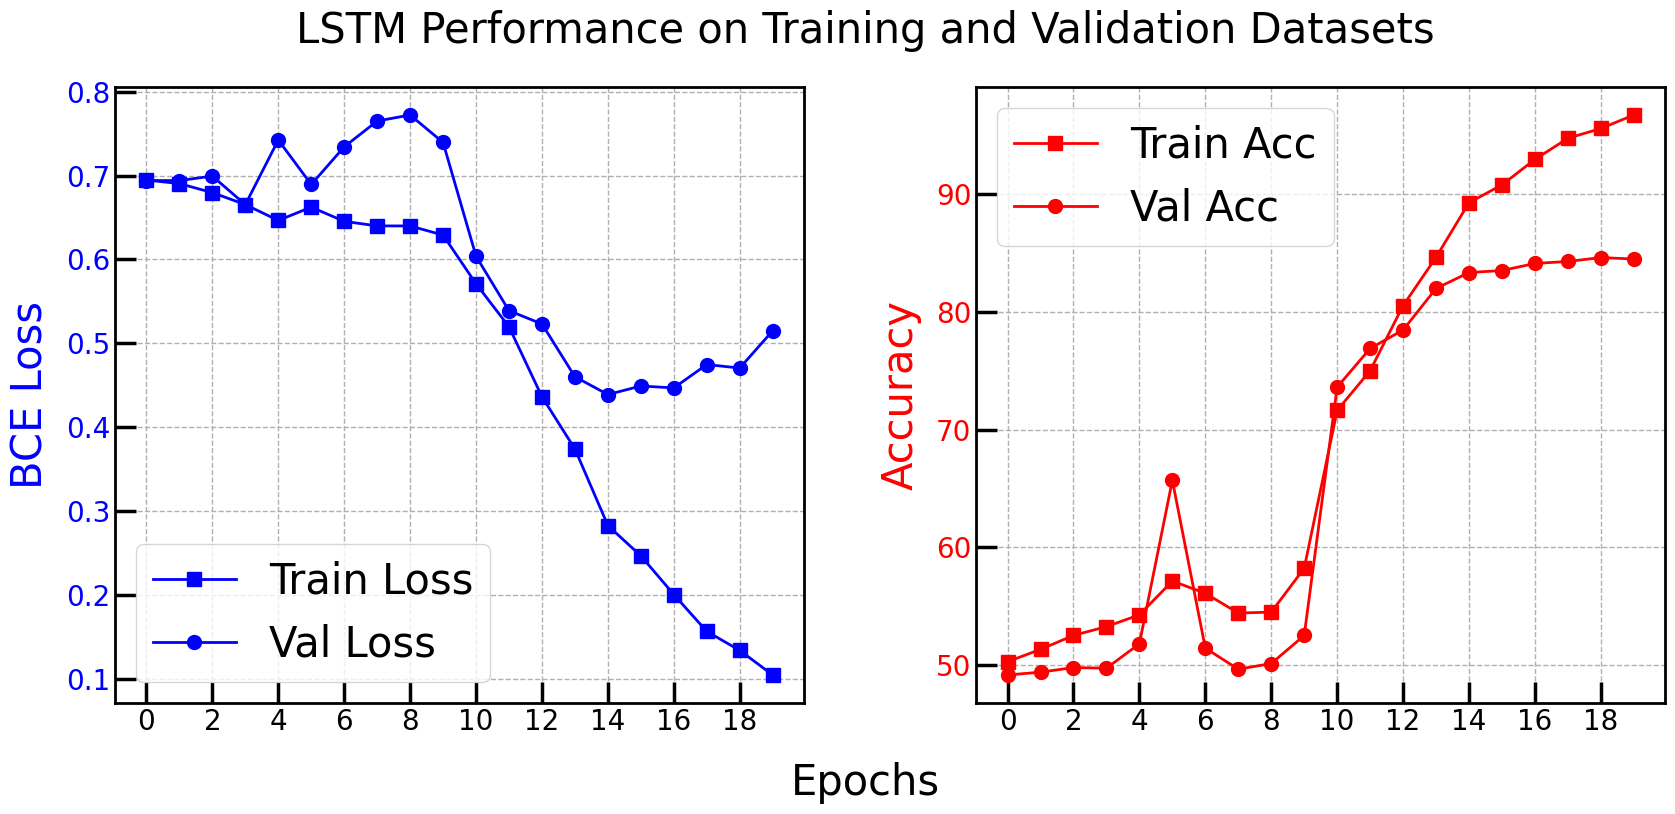

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

ax1 = plt.subplot(1,2, 1)

''' Left plot contains the validation and training lossess '''
plot_1 = ax1.plot(range(0, 20), training_stats['Training_Loss'], color = 'blue', label = 'Train Loss',\
             marker = 's', linewidth=2.0, markersize = 10)

plot_2 = ax1.plot(range(0, 20), training_stats['Val_Loss'], color = 'blue', label = 'Val Loss',\
             marker = 'o', linewidth=2.0, markersize = 10)

ax1.tick_params(axis ='y', labelcolor = 'blue',labelsize=20, width=3) 
ax1.tick_params(axis ='x', labelcolor = 'black',labelsize=20, width=3)
ax1.legend(fontsize = 30)
plt.xticks(range(0,20, 2))
# ax1.set_xlim([-1, 30])
ax1.set_ylabel("BCE Loss", fontsize = 30, labelpad = 10, color = 'blue')


''' Right plot contains the training and validation accuracies '''
ax1a = plt.subplot(1,2, 2)
plot_11 = ax1a.plot(range(0, 20), training_stats['Training_Accuracy'], color = 'red', label = 'Train Acc',\
             marker = 's', linewidth=2.0, markersize = 10)

plot_22 = ax1a.plot(range(0, 20), training_stats['Val_Accuracy'], color = 'red', label = 'Val Acc',\
             marker = 'o', linewidth=2.0, markersize = 10)
ax1a.legend(fontsize = 30)
plt.xticks(range(0,20,2))
# ax1a.set_xlim([-1, 30])
ax1a.tick_params(axis ='y', labelcolor = 'red',labelsize=20, width=3) 
ax1a.tick_params(axis ='x', labelcolor = 'black',labelsize=20, width=3)
ax1a.set_ylabel("Accuracy", fontsize = 30, labelpad = 10, color = 'red')


# for ax1 
ax1.tick_params(which='both', width=2.5)
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=5)
ax1.tick_params(which = 'both', direction = 'in')

# for ax1a
ax1a.tick_params(which='both', width=2.5)
ax1a.tick_params(which='major', length=15)
ax1a.tick_params(which='minor', length=5)
ax1a.tick_params(which = 'both', direction = 'in') 

# set various colors
ax1a.spines['bottom'].set_color('black')
ax1a.spines['top'].set_color('black') 
ax1a.spines['right'].set_color('black')
ax1a.spines['right'].set_linewidth(2)
ax1a.spines['top'].set_linewidth(2)
ax1a.spines['bottom'].set_linewidth(2)
ax1a.spines['left'].set_color('black')
ax1a.spines['left'].set_lw(2)

# set various colors
ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black') 
ax1.spines['right'].set_color('black')
ax1.spines['right'].set_linewidth(2)
ax1.spines['top'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_color('black')
ax1.spines['left'].set_lw(2)


ax1.grid(True, which = 'major', alpha = 1, linestyle='--', linewidth = 1)
ax1a.grid(True, which = 'major', alpha = 1, linestyle='--', linewidth = 1)


plt.subplots_adjust(wspace=0.25,hspace=0.)
fig.text(0.5, 0.01, 'Epochs', ha='center', va='center', fontsize = 30)

fig.text(0.5, 0.95, 'LSTM Performance on Training and Validation Datasets', ha='center', va='center', fontsize = 30)

# Model Evaluation 

In [ ]:
def make_predictions_on_dataloaders(trained_model, dataloader):
    target = []
    probabilities = []
    predictions = []
    pred_probs_for_all_class = []

    with torch.no_grad():
        trained_model.eval()
        for features_, labels in tqdm(dataloader):
            features_ = features_.to(device)
            labels = labels.to(device)
            yb = trained_model(features_)
            probs = yb.cpu().detach().numpy()
            preds = (probs >= 0.5).astype(int)  # threshold at 0.5 for binary classification
            target.append(labels.cpu().detach().numpy())
            probabilities.append(probs)
            predictions.append(preds)
            pred_probs_for_all_class.append(np.concatenate((1-probs, probs), axis=1))  # add negative class predictions

    return target, probabilities, predictions, pred_probs_for_all_class

In [ ]:
target, probabilities, predictions, pred_probs_for_all_class = make_predictions_on_dataloaders(model, testloader)

100%|██████████| 15/15 [00:04<00:00,  3.51it/s]


In [ ]:
def flatten(input_arr):
    output = []
    for i in input_arr:
        for j in i:
            output.append(j)
    return output

In [ ]:
predictions = flatten([list(i) for i in predictions])
target = flatten([list(i) for i in target])
probabilities = flatten([list(i) for i in probabilities])
pred_probs_for_all_class = np.array(flatten(pred_probs_for_all_class))

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, roc_curve, precision_score, recall_score, f1_score

In [ ]:
print("The testing accuracy is: {}".format(accuracy_score(target, predictions)*100))

The testing accuracy is: 84.50666666666666


In [ ]:
print("Precision (Test): ", precision_score(target, predictions, average = 'weighted'))
print("Recall (Test): ", recall_score(target, predictions, average = 'weighted'))
print("F1 (Test): ", f1_score(target, predictions, average = 'weighted'))

Precision (Test):  0.845088204369394
Recall (Test):  0.8450666666666666
F1 (Test):  0.8450687820616207


In [ ]:
print("Classification Report")
print(classification_report(target, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      3722
           1       0.85      0.84      0.85      3778

    accuracy                           0.85      7500
   macro avg       0.85      0.85      0.85      7500
weighted avg       0.85      0.85      0.85      7500



The above classification report shows the performance of a binary classification model on a test dataset consisting of 7500 samples. The report includes several metrics to evaluate the performance of the model, such as precision, recall, and f1-score.

- Precision: The precision metric measures the ratio of true positives to the total predicted positives. In this report, the precision for class 0 is 0.84, which means that 84% of the predicted positive samples for class 0 are actually positive. Similarly, for class 1, the precision is 0.85.

- Recall: The recall metric measures the ratio of true positives to the total actual positives. In this report, the recall for class 0 is 0.85, which means that the model correctly identified 85% of the actual positive samples for class 0. Similarly, for class 1, the recall is 0.84.

- F1-score: The F1-score metric is the harmonic mean of precision and recall. It provides a balance between precision and recall. In this report, the F1-score for class 0 is 0.84, and for class 1, it is 0.85.

The macro average F1-score is also given in the report, which is the average of F1-scores for both classes. The weighted average F1-score is also provided, which takes into account the class imbalance in the dataset.

Overall, the model seems to perform reasonably well with an accuracy of 0.85, and similar precision, recall, and F1-score for both classes.

In [ ]:
cf_matrix = confusion_matrix(target, predictions)
dataframe = pd.DataFrame(cf_matrix, index = ['Negative', 'Positive'], columns = ['Negative', 'Positive'])

In [ ]:
dataframe

,Negative,Positive
Negative,3153,569
Positive,593,3185


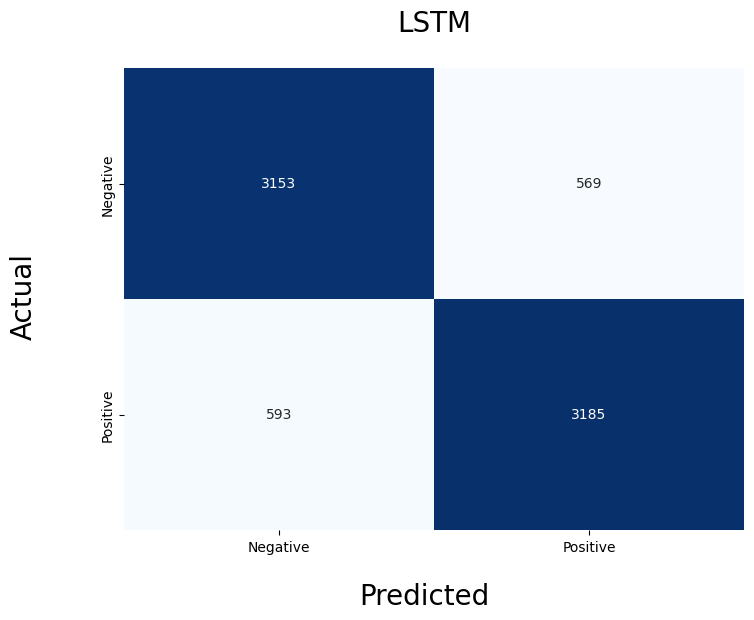

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))

ax1 = plt.subplot(1, 1, 1)

sns.heatmap(dataframe, cmap="Blues", annot = True, fmt="d", cbar =False)
fig.text(0.5, 0.00, 'Predicted', ha='center', va='center', fontsize = 20)
fig.text(0.0, 0.5, 'Actual', ha='center', va='center', rotation='vertical', fontsize = 20)
ax1.text(0.5, 1.08, 'LSTM',
    horizontalalignment='center',
    fontsize=20,
    transform = ax1.transAxes);

A confusion matrix is a table used to evaluate the performance of a classification algorithm. It provides a summary of the predicted and actual classifications of a dataset. 

In this particular confusion matrix, we have a binary classification problem where we are trying to predict two classes: Negative and Positive. The actual classifications are represented by the rows, while the predicted classifications are represented by the columns.

The table shows that there are 3153 instances where the actual classification is Negative, and the algorithm predicted Negative (True Negatives). There are 569 instances where the actual classification is Negative, but the algorithm predicted Positive (False Positives).

Similarly, there are 593 instances where the actual classification is Positive, but the algorithm predicted Negative (False Negatives), and 3185 instances where the actual classification is Positive, and the algorithm predicted Positive (True Positives).

The confusion matrix can be used to calculate various performance metrics such as accuracy, precision, recall, and F1 score. For instance, the accuracy in this case can be calculated as (3153 + 3185) / (3153 + 569 + 593 + 3185) = 0.8538, which indicates that the algorithm correctly predicted the class of 85.38% of the instances.

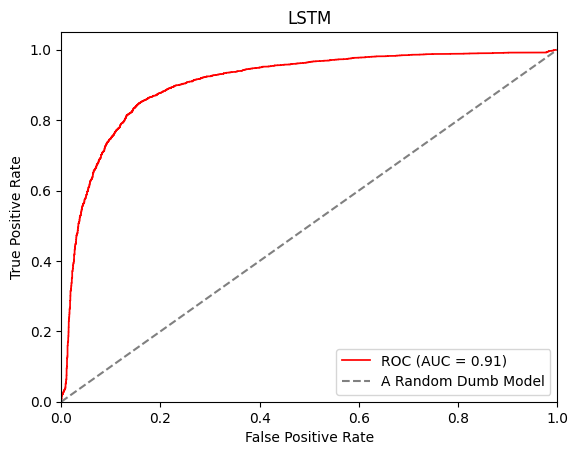

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# y_test are the true labels and y_score are the predicted probabilities for the positive class
fpr, tpr, thresholds = roc_curve(target, probabilities, pos_label=1)

# Compute AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, lw=1.25, label='ROC (AUC = %0.2f)' % (roc_auc), color = 'red')
plt.plot([0, 1], [0, 1], '--', color='gray', label='A Random Dumb Model')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LSTM')
plt.legend(loc="lower right")
plt.show()

In [ ]:
auc_score_ovr = roc_auc_score(target, probabilities)
print("AUC SCORE (Test Set): {}".format(auc_score_ovr))

AUC SCORE (Test Set): 0.9059854074708947


The AUC (Area Under the Curve) score is a metric used to evaluate the performance of a binary classification algorithm. It measures the area under the Receiver Operating Characteristic (ROC) curve, which plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various classification thresholds.

An AUC score of 0.9059854074708947 indicates that the algorithm has a good ability to distinguish between the positive and negative classes. The score ranges from 0 to 1, with a score of 0.5 indicating random guessing, and a score of 1 indicating perfect classification.

# Results and Prediction

In [ ]:
def predict_sentiment(text):
  text = custom_preprocessing_pipeline(custom_cleaning_pipeline(text))
  text = [[converting_integers_and_words[word] for word in text.split() if word in converting_integers_and_words.keys()]]
  text = paddind_sequences(text, pad_id=converting_integers_and_words['<PAD>'], seq_length=max_length_of_sequence)
  text_tensor = torch.tensor(text).to(device)
  
  return model(text_tensor).cpu().detach().numpy()

In [ ]:
classes = ['Negative', 'Positive']

In [ ]:
text = 'The movie is very good. The actors were good. I loved the movie'
prob = predict_sentiment(text)[0][0]
pred = 1 if prob >= 0.5 else 0 

if pred == 0:
  prob = 1 - prob
print("The predicted class is {}, with a predicted probability of {}.".format(classes[pred], round(prob, 5)))

The predicted class is Positive, with a predicted probability of 0.9912099838256836.


In [ ]:
text = 'The movie is very bad. The actors were pathetic. I think I wasted my money on this movie.'
prob = predict_sentiment(text)[0][0]
pred = 1 if prob >= 0.5 else 0 

if pred == 0:
  prob = 1 - prob
print("The predicted class is {}, with a predicted probability of {}.".format(classes[pred], round(prob, 5)))

The predicted class is Negative, with a predicted probability of 0.9955.


<b> Lets make a single prediction from a real data

In [ ]:
df.sample(1, random_state = 420)

,processed,label
10427,register imdb post comment awful movie ismy ca...,0


In [ ]:
random_text = df['processed'].sample(1, random_state = 420).values[0];random_text

'register imdb post comment awful movie ismy cat ball string better storyline worst act ive ever see wipe almost entire cast movie within 5 minutes leave bite desire wasnt single scare moment movie exception watch movie halloween tv around seem like couldve good story roll credit say chasey lie bite loss didnt recognize right away scene already couldve say oh yeah im glad saw hotel didnt pay id real tick pay cent see normally like least find redeem factor movie one exception bad even amuse sogooditsbadits plain bad'

In [ ]:
prob = predict_sentiment(random_text)[0][0]
pred = 1 if prob >= 0.5 else 0 

if pred == 0:
  prob = 1 - prob
print("The predicted class is {}, with a predicted probability of {}.".format(classes[pred], round(prob, 5)))

The predicted class is Negative, with a predicted probability of 0.99564.


# Conclusion

The result indicates the performance of a binary classification model trained on a dataset of 7500 samples, where 3722 samples belong to class 0 and 3778 samples belong to class 1. The overall accuracy of the model on the test set is 85%, which is a good performance for this type of task.
The training and validation loss and accuracy indicate the performance of the model during the training process. The training loss and accuracy indicate how well the model is fitting to the training data, while the validation loss and accuracy indicate how well the model is generalizing to new data. In this case, the training accuracy is very high (96.74%) while the validation accuracy is slightly lower (84.51%). This suggests that the model is overfitting to the training data and may not generalize well to new data.